In [2]:
# import and data loading
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm

# load dataset

df = pd.read_csv('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/data/raw/mtsamples.csv')

# keeping only relevant columns
df = df[['medical_specialty', 'transcription']].dropna()

df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [4]:
# Downloading nltk resources

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...


True

In [15]:
# Defining a clean text function

# Import statements
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))  
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(f"[{string.punctuation}0-9\\r\\t\\n]", " ", text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords and lemmatization
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words] 
    
    return ' '.join(words)

# Apply the cleaning function
tqdm.pandas()
df['cleaned_text'] = df['transcription'].astype(str).progress_apply(clean_text)

  0%|          | 0/4966 [00:00<?, ?it/s]

In [16]:
# Validate the cleaning process

df[['transcription', 'cleaned_text']].sample(3, random_state=42)

,transcription,cleaned_text
3162,"HISTORY OF PRESENT ILLNESS:, The patient is w...",history present illness patient well known his...
1981,"PREPROCEDURE DIAGNOSIS:, Chest pain secondary...",preprocedure diagnosis chest pain secondary fr...
1361,"HISTORY OF PRESENT ILLNESS: , The patient is a...",history present illness patient year old femal...


In [17]:
# Saving the cleaned data

df.to_csv('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/data/processed/cleaned_mtsamples.csv', index=False)

In [18]:
# Quality check

df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['word_count'].describe(percentiles=[.1, .5, .9, .95])

count    4966.000000
mean      275.730568
std       177.419040
min         1.000000
10%        93.000000
50%       244.000000
90%       505.000000
95%       601.000000
max      1674.000000
Name: word_count, dtype: float64

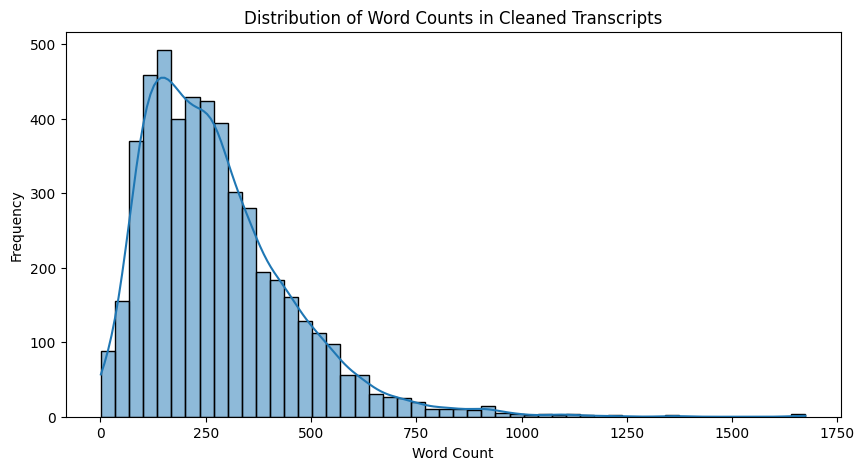

In [19]:
# Plotting the distribution of word counts

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts in Cleaned Transcripts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()